In [1]:
import pandas as pd
data=pd.read_csv('/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [2]:
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [3]:
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [4]:
print(data.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [5]:
# Check missing values per column
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_percent = (data.isnull().sum() / len(data) * 100).sort_values(ascending=False)
missing_summary = pd.concat([missing_data, missing_percent], axis=1)
missing_summary.columns = ['MissingCount', 'MissingPercent']
print(missing_summary)

# Check target distribution
print(data['Attrition'].value_counts())
print(data['Attrition'].value_counts(normalize=True))


                          MissingCount  MissingPercent
Age                                  0             0.0
Attrition                            0             0.0
BusinessTravel                       0             0.0
DailyRate                            0             0.0
Department                           0             0.0
DistanceFromHome                     0             0.0
Education                            0             0.0
EducationField                       0             0.0
EmployeeCount                        0             0.0
EmployeeNumber                       0             0.0
EnvironmentSatisfaction              0             0.0
Gender                               0             0.0
HourlyRate                           0             0.0
JobInvolvement                       0             0.0
JobLevel                             0             0.0
JobRole                              0             0.0
JobSatisfaction                      0             0.0
MaritalSta

In [6]:
# Check for duplicate rows
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Optionally, remove duplicates
data = data.drop_duplicates().reset_index(drop=True)


Number of duplicate rows: 0


/tmp/ipykernel_55/2843820195.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, v + max(target_counts.values)*0.01, f"{v} ({target_percent[i]:.1f}%)",


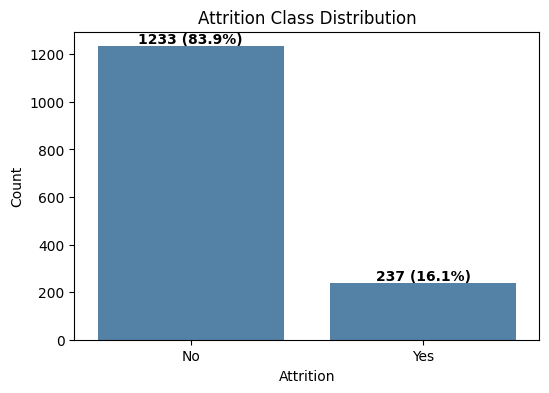

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Target counts ---
target_counts = data['Attrition'].value_counts()
target_percent = data['Attrition'].value_counts(normalize=True) * 100

# --- Bar plot ---
plt.figure(figsize=(6,4))
sns.barplot(x=target_counts.index, y=target_counts.values, color='steelblue')
plt.title('Attrition Class Distribution')
plt.ylabel('Count')
plt.xlabel('Attrition')

# --- Annotate bars with count and percentage ---
for i, v in enumerate(target_counts.values):
    plt.text(i, v + max(target_counts.values)*0.01, f"{v} ({target_percent[i]:.1f}%)", 
             ha='center', fontweight='bold')

plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# --- Separate features and target ---
X = data.drop('Attrition', axis=1)
y = data['Attrition'].map({'No': 0, 'Yes': 1})  # binary numeric target

# --- Identify numerical and categorical columns ---
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# --- Split first (to avoid leakage) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Build preprocessing pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ]
)

# --- Fit on training data and transform both train and test ---
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed  = preprocessor.transform(X_test)

# --- Optional: get feature names after one-hot encoding ---
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = list(numerical_cols) + list(ohe_columns)

# --- Convert back to DataFrame ---
X_train_processed = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed  = pd.DataFrame(X_test_processed, columns=feature_names)

print("Processed X_train shape:", X_train_processed.shape)
print("Processed X_test shape:", X_test_processed.shape)


Processed X_train shape: (1176, 55)
Processed X_test shape: (294, 55)


In [14]:
from imblearn.over_sampling import SMOTE

# Count current class sizes
class_counts = y_train.value_counts()
minority_class = 1  # assuming 1 = minority
majority_class = 0  # assuming 0 = majority

# Define desired number of minority samples
target_minority_size = 275  # adjust between 250–300

# Use dict to specify exact counts
sampling_strategy = {minority_class: target_minority_size}

# Apply SMOTE
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_aug, y_train_aug = smote.fit_resample(X_train_processed, y_train)

# Check new counts
print("After partial SMOTE:")
print(y_train_aug.value_counts())


After partial SMOTE:
Attrition
0    986
1    275
Name: count, dtype: int64


In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# --- Create numeric features ---
def engineer_numeric_features(df):
    df = df.copy()
    # Income per year at company
    df['Income_per_YearAtCompany'] = df['MonthlyIncome'] / (df['YearsAtCompany'] + 1)
    
    # Stock options per total working years
    df['Stock_per_TotalYears'] = df['StockOptionLevel'] / (df['TotalWorkingYears'] + 1)
    
    return df

X_train_fe = engineer_numeric_features(X_train_aug)
X_test_fe  = engineer_numeric_features(X_test_processed)

# --- Create categorical features (bins) ---
bins_distance = [0, 5, 15, 30, 50]
labels_distance = ['VeryClose', 'Close', 'Far', 'VeryFar']

X_train_fe['DistanceGroup'] = pd.cut(X_train_fe['DistanceFromHome'], bins=bins_distance, labels=labels_distance)
X_test_fe['DistanceGroup']  = pd.cut(X_test_fe['DistanceFromHome'], bins=bins_distance, labels=labels_distance)

# --- One-hot encode new categorical features ---
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit on training data
distance_ohe_train = ohe.fit_transform(X_train_fe[['DistanceGroup']])
distance_ohe_test  = ohe.transform(X_test_fe[['DistanceGroup']])

# Get new column names
distance_columns = ohe.get_feature_names_out(['DistanceGroup'])

# Convert to DataFrame
distance_train_df = pd.DataFrame(distance_ohe_train, columns=distance_columns, index=X_train_fe.index)
distance_test_df  = pd.DataFrame(distance_ohe_test, columns=distance_columns, index=X_test_fe.index)

# Drop original 'DistanceGroup' and concat one-hot columns
X_train_final = pd.concat([X_train_fe.drop('DistanceGroup', axis=1), distance_train_df], axis=1)
X_test_final  = pd.concat([X_test_fe.drop('DistanceGroup', axis=1), distance_test_df], axis=1)

# --- Check final shapes ---
print("X_train_final shape:", X_train_final.shape)
print("X_test_final shape:", X_test_final.shape)


X_train_final shape: (1261, 59)
X_test_final shape: (294, 59)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       247
           1       0.55      0.34      0.42        47

    accuracy                           0.85       294
   macro avg       0.72      0.64      0.67       294
weighted avg       0.83      0.85      0.84       294

=== Confusion Matrix ===
[[234  13]
 [ 31  16]]
ROC AUC: 0.787


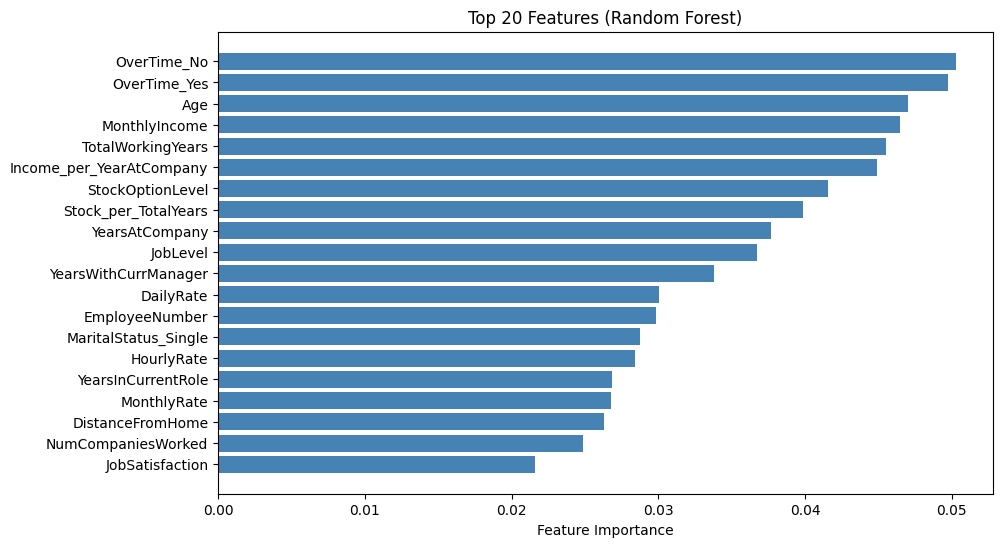

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# -------------------
# 1️⃣ Train Random Forest
# -------------------
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_final, y_train_aug)

# -------------------
# 2️⃣ Evaluate on test set
# -------------------
y_pred = rf_model.predict(X_test_final)
y_pred_prob = rf_model.predict_proba(X_test_final)[:, 1]

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC: {roc_auc:.3f}")

# -------------------
# 3️⃣ Feature Importances Plot
# -------------------
importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X_train_final.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'].head(20)[::-1], feat_imp_df['Importance'].head(20)[::-1], color='steelblue')
plt.xlabel('Feature Importance')
plt.title('Top 20 Features (Random Forest)')
plt.show()
